#**Bibliotecas**

In [3]:
# Importamos bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para calcular las estacionalidad, tendencia y residuo
import statsmodels.api as sm

# Matplotlib muestra los resultados en la Notebook de Jupyter
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Exploración de datos**

In [4]:
# Tomar datos del url en formato "raw"
url = 'https://raw.githubusercontent.com/eduardxmartinez/FisicaComputacional/master/Actividad1/2030.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha','Precip','Evap','Tmax','Tmin',]
df_tkt = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python') 

# Hacemos una copia de trabajo y preservamos el dataframe original
df_tkt0 = df_tkt.copy()

# Cambiamos la palabra nulo por un vacío y verificamos
str_Nulo = 'Nulo'
df_tkt1 = df_tkt0.replace(to_replace=str_Nulo, value='', regex=True)

# Convertimos los valores de las variables ambientales a números flotantes y verificamos 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_tkt1[cols] = pd.to_numeric(df_tkt0[cols], errors='coerce')

# Definimos un nuevo dataframe por si hay que regresarse
df_tkt2 = df_tkt1.copy()
df_tkt2['Fecha'].head()

# Se convierte el objeto Fecha a variable fecha que python reconoce
df_tkt2['Fecha'] = pd.to_datetime(df_tkt2['Fecha'], dayfirst=True).copy()

# Añadimos dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_tkt2['Año'] = df_tkt2['Fecha'].dt.year
df_tkt2['Mes'] = df_tkt2['Fecha'].dt.month

# Hacemos una copia del trabajo y es con el que trabajaremos para el análisis de datos
df_meteotkt = df_tkt2.copy()

# Eliminamos la columna de Mes(numérico) y agregamos Mes(caractéres)
df_meteotkt.drop('Mes', axis=1, inplace=True)
df_meteotkt['Mes'] = df_meteotkt['Fecha'].dt.strftime('%b')
df_meteotkt.info()
print(df_meteotkt.head())
print(df_meteotkt.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23084 entries, 0 to 23083
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   23084 non-null  datetime64[ns]
 1   Precip  23024 non-null  float64       
 2   Evap    4447 non-null   float64       
 3   Tmax    22382 non-null  float64       
 4   Tmin    22384 non-null  float64       
 5   Año     23084 non-null  int64         
 6   Mes     23084 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.2+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1946-01-01     0.0   NaN   NaN   NaN  1946  Jan
1 1946-01-02    21.0   NaN  18.4   NaN  1946  Jan
2 1946-01-03     0.0   NaN   NaN   NaN  1946  Jan
3 1946-01-04     9.5   NaN  11.1   1.1  1946  Jan
4 1946-01-05     0.0   NaN  15.0   4.4  1946  Jan
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
23079 2012-10-27     0.0   NaN  33.0   6.0  2012  Oct
23080 2

In [5]:
# Nueva copia del DataFrame para Series de Tiempo
df_meteotkt_ts = df_meteotkt.copy()

# Reemplazamos el índice por la variable 'Fecha' 
df_meteotkt_ts = df_meteotkt.set_index('Fecha')

# Seleccionaremos un conjunto de años de 30 años
df_30 = df_meteotkt_ts[(df_meteotkt_ts['Año'] >= 1930) & (df_meteotkt_ts['Año'] < 1960)]
df_60 = df_meteotkt_ts[(df_meteotkt_ts['Año'] >= 1960) & (df_meteotkt_ts['Año'] < 1990)]
df_90 = df_meteotkt_ts[(df_meteotkt_ts['Año'] >= 1990) & (df_meteotkt_ts['Año'] < 2013)]

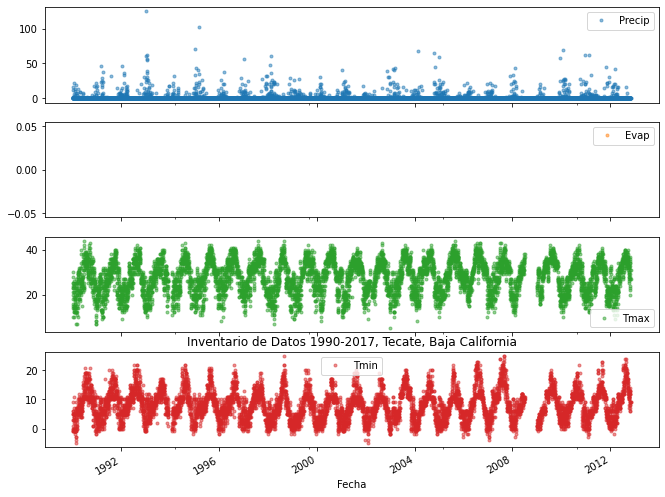

In [6]:
# Visualizamos la colección de los últimos 30 años y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1990-2017, Tecate, Baja California');

# **A1**

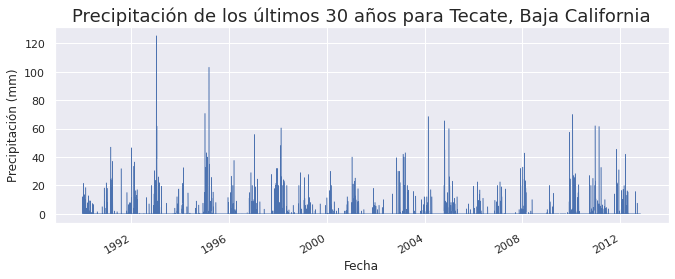

In [7]:
# Graficamos la Precipitación de los últimos 30 años (1990-hasta 2012)
sns.set(rc={'figure.figsize':(11, 4)})
df_90['Precip'].plot(linewidth=0.5,);

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación de los últimos 30 años para Tecate, Baja California', size=18)

plt.show()

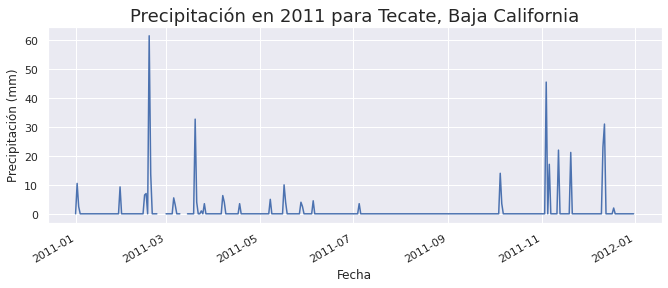

In [8]:
# Investigando un año de datos para Precipitación
sns.set(rc={'figure.figsize':(11, 4)})

ax = df_90.loc['2011', 'Precip'].plot()
ax.set_ylabel('Precipitación (mm)');
ax.set_title('Precipitación en 2011 para Tecate, Baja California', size=18);

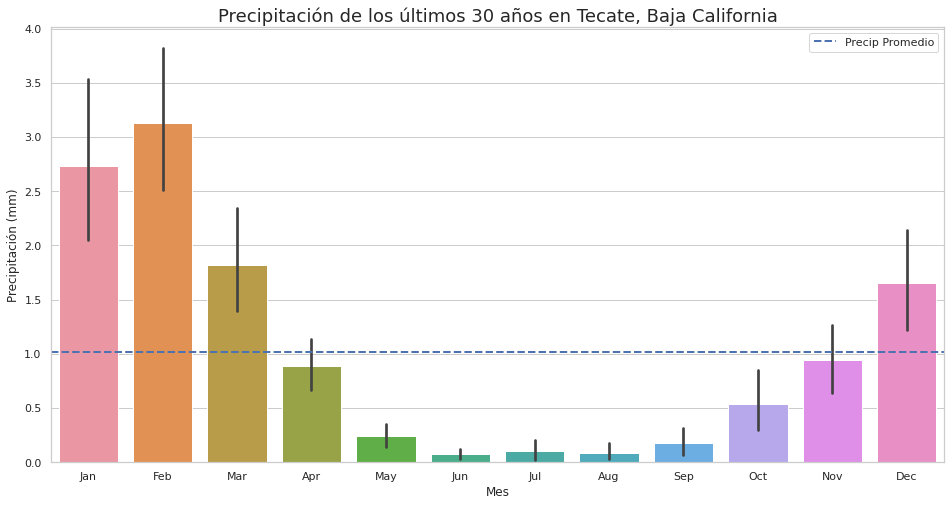

In [50]:
# Gráfica de Precipitacíon en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Precipitación
Precip_m=df_90.Precip.mean()

# Gráfica de cajas
sns.barplot(x='Mes', y='Precip', data=df_90)

# Líneas de la Precipitación promedio
plt.axhline(Precip_m, color='b', linestyle='--', linewidth=2, label=f'Precip Promedio');
plt.legend();
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación de los últimos 30 años en Tecate, Baja California', fontsize=18)

plt.show()

# **A2**

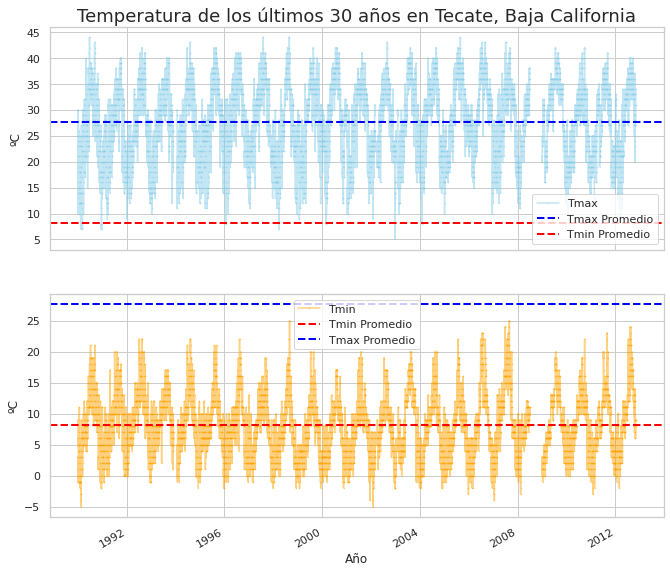

In [10]:
# Gráfica de Tmax y Tmin de los últimos 30 años 
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)

# Subplot 1
f1 = df_90.Tmax.plot(ax=axes[0],marker='.', color='skyblue', markersize=1, linestyle='-', alpha=0.5)
l1 = axes[0].axhline(df_90.Tmax.mean(), color='blue', linestyle='--', 
                     linewidth=2, label='Tmax Promedio');
l12 = axes[0].axhline(df_90.Tmin.mean(), color='red', linestyle='--', 
                     linewidth=2, label='Tmin Promedio');
                
  # Etiquetas
axes[0].legend(loc='best');
axes[0].set_ylabel('ºC');
axes[0].set_title('Temperatura de los últimos 30 años en Tecate, Baja California', size=18);

# Subplot 2
f2 = df_90.Tmin.plot(ax=axes[1],marker='.', color='orange', markersize=1, linestyle='-', alpha=0.5)
l2 = axes[1].axhline(df_90.Tmin.mean(), color='red', linestyle='--', 
                     linewidth=2, label='Tmin Promedio');
l21 = axes[1].axhline(df_90.Tmax.mean(), color='blue', linestyle='--', 
                     linewidth=2, label='Tmax Promedio');
  # Etiquetas
axes[1].legend(loc='best');
axes[1].set_xlabel('Año');
axes[1].set_ylabel('ºC');

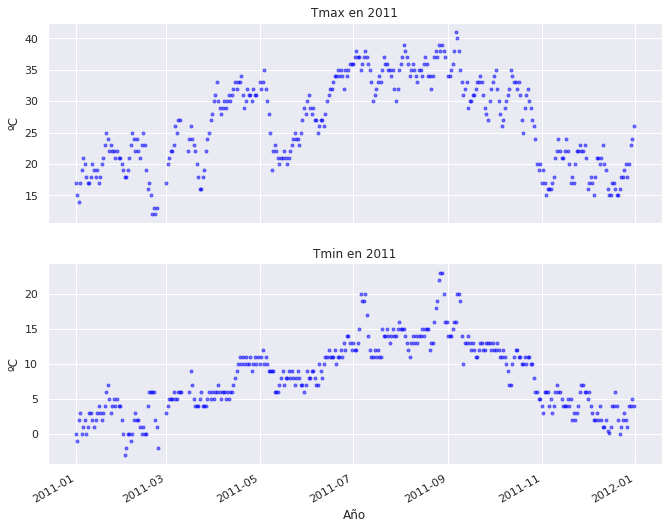

In [11]:
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Gráfica de Tmax y Tmin en un año específico 
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)

#Subgraficas
for name, ax in zip(['Tmax', 'Tmin'], axes):
  df_90[name].loc['2011'].plot(x='Mes', y=name, ax=ax, label=name, color=['blue', 'orange'], marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
  ax.set_title(name + ' en 2011')
  ax.set_ylabel('ºC');

# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')
  else:
    ax.set_xlabel('Año')

# Etiqueta eje Y 
  ax.set_ylabel('ºC');

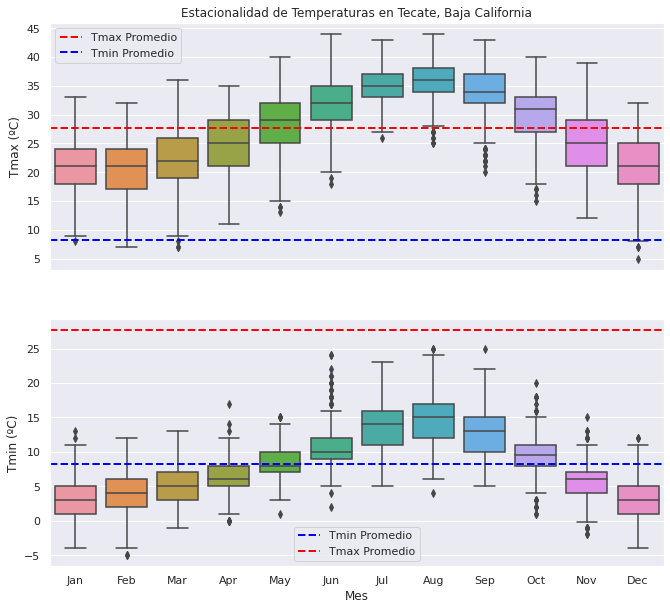

In [12]:
# Analizando Estacionalidad de los datos dos gráficas en una
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Rango de Tiempo
start, end = '1990', '2012'

# Subplot 1
f1 = sns.boxplot(data=df_90, x='Mes', y='Tmax', ax=axes[0])
l1 = axes[0].axhline(df_90.loc[start:end, 'Tmax'].mean(), color='red', linestyle='--', 
                     linewidth=2, label='Tmax Promedio');
l12 = axes[0].axhline(df_90.loc[start:end, 'Tmin'].mean(), color='blue', linestyle='--', 
                     linewidth=2, label='Tmin Promedio');
  # Etiquetas
axes[0].legend(loc='best');
axes[0].set_ylabel('Tmax (ºC)');
axes[0].set_xlabel('');
axes[0].set_title('Estacionalidad de Temperaturas en Tecate, Baja California');


# Subplot 2
f2 = sns.boxplot(data=df_90, x='Mes', y='Tmin', ax=axes[1])
l2 = axes[1].axhline(df_90.loc[start:end, 'Tmin'].mean(), color='blue', linestyle='--', 
                     linewidth=2, label='Tmin Promedio');
l21 = axes[1].axhline(df_90.loc[start:end, 'Tmax'].mean(), color='red', linestyle='--', 
                     linewidth=2, label='Tmax Promedio');
  # Etiquetas                      
axes[1].legend(loc='best');
axes[1].set_ylabel('Tmin (ºC)');
axes[1].set_xlabel('Mes');
axes[1].set_title('');



# **A3**
Sólo se tienen datos de Evaporación 1960-1975

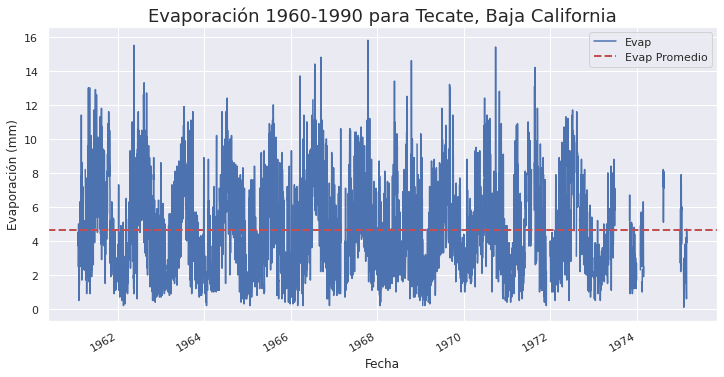

In [53]:
# Graficamos la Evaporación de 1960-1990
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Investigando datos para Evaporación
ax = df_60.Evap.plot()
ax.set_ylabel('Evaporación (mm)');
ax.set_title('Evaporación 1960-1990 para Tecate, Baja California', size=18);

# Cálculo de promedios
Evap_ave_60 = df_60.Evap.mean()

# Graficar líneas promedios
plt.axhline(Evap_ave_60,color='r', linestyle='--', linewidth=2, label=f'Evap Promedio');
plt.legend();

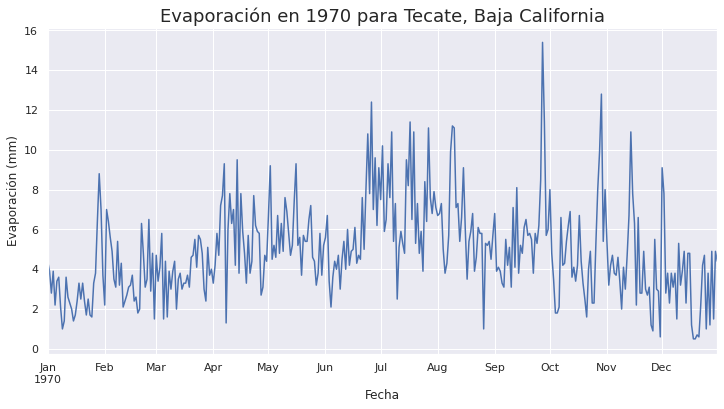

In [14]:
# Gráfica para un año en específico
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Investigando un año de datos para Evaporación
ax = df_60.loc['1970', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)');
ax.set_title('Evaporación en 1970 para Tecate, Baja California', size=18);


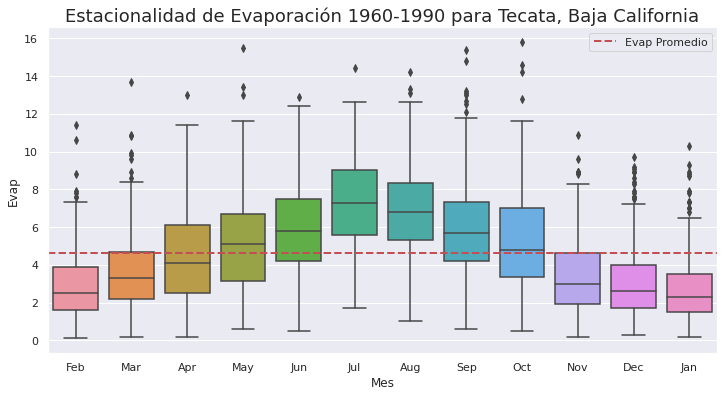

In [15]:
# Estacionalidad de los datos, filtrados por mes
sns.boxplot(data=df_60, x='Mes', y='Evap');
plt.axhline(Evap_ave_60,color='r', linestyle='--', linewidth=2, label='Evap Promedio');

# Etiquetas                      
plt.legend(loc='best');
plt.title('Estacionalidad de Evaporación 1960-1990 para Tecata, Baja California', size=18);

# **A4**

In [59]:
# Suaviza la curva Tmax, utilizando promedios móviles 7, 30, y 365 dias
# Utilizamos datos de 1960-1990 para Evaporación
# 1990-2020 para las Temperaturas

data_cols=['Evap', 'Tmax', 'Tmin']
df_60_7d = df_60[data_cols].rolling(7, center=True,min_periods=1).mean()
df_60_30d = df_60[data_cols].rolling(30, center=True,min_periods=1).mean()
df_60_365d = df_60[data_cols].rolling(365, center=True,min_periods=1).mean()

df_90_7d = df_90[data_cols].rolling(7, center=True,min_periods=1).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True,min_periods=1).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True,min_periods=1).mean()

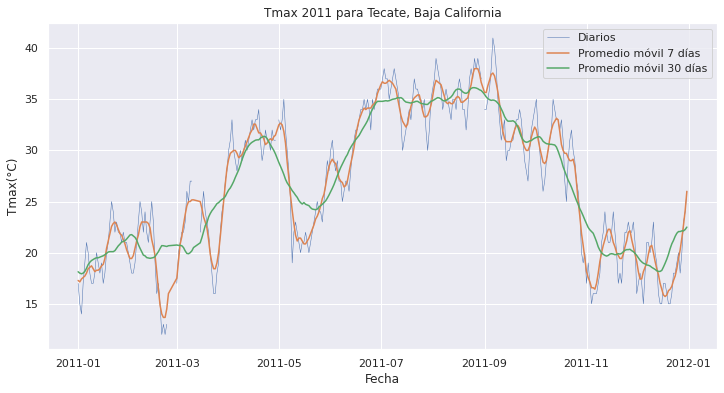

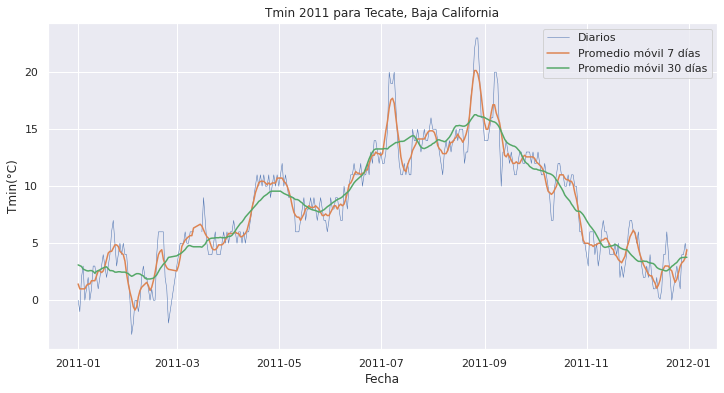

In [60]:
# Gráfica Temperaturas
# Año que deseamos estudiar
year = '2011'

# Contraste de las gráficas diarias con la curva suavizada a 7 y 30 días
sns.set(rc={'figure.figsize':(12, 6)})

for name, ax in zip(['Tmax','Tmin'],axes):
  fig, ax = plt.subplots()
  ax.plot(df_90.loc[year, name], linestyle='-', linewidth=0.5, label='Diarios')
  ax.plot(df_90_7d.loc[year, name], linestyle='-', label=f'Promedio móvil {7} días')
  ax.plot(df_90_30d.loc[year, name], linestyle='-', label=f'Promedio móvil {30} días')
 
  ax.set_xlabel('Fecha')
  ax.set_ylabel(name +'(°C)')
  ax.set_title(name + ' 2011 para Tecate, Baja California')
  ax.legend();

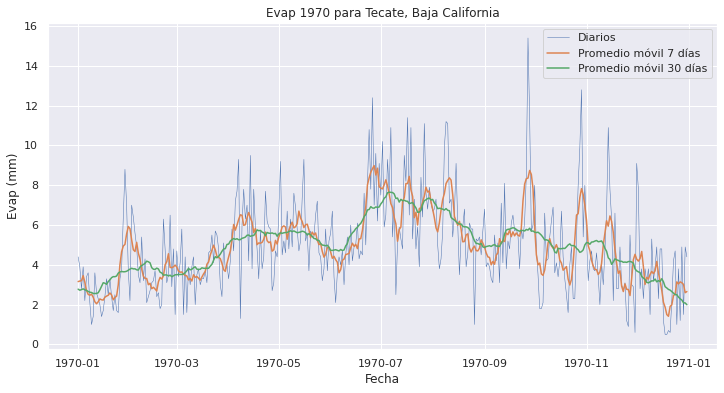

In [61]:
# Gráfica Temperaturas
# Año que deseamos estudiar
year = '1970'

# Contraste de las gráficas diarias con la curva suavizada a 7 y 30 días
sns.set(rc={'figure.figsize':(12, 6)})

for name, ax in zip(['Evap'],axes):
  fig, ax = plt.subplots()
  ax.plot(df_60.loc[year, name], linestyle='-', linewidth=0.5, label='Diarios')
  ax.plot(df_60_7d.loc[year, name], linestyle='-', label=f'Promedio móvil {7} días')
  ax.plot(df_60_30d.loc[year, name], linestyle='-', label=f'Promedio móvil {30} días')
 
  ax.set_xlabel('Fecha')
  ax.set_ylabel(name +' (mm)')
  ax.set_title(name + ' 1970 para Tecate, Baja California')
  ax.legend();

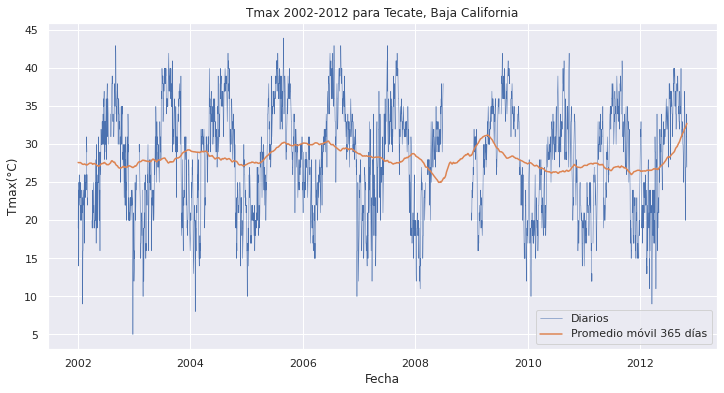

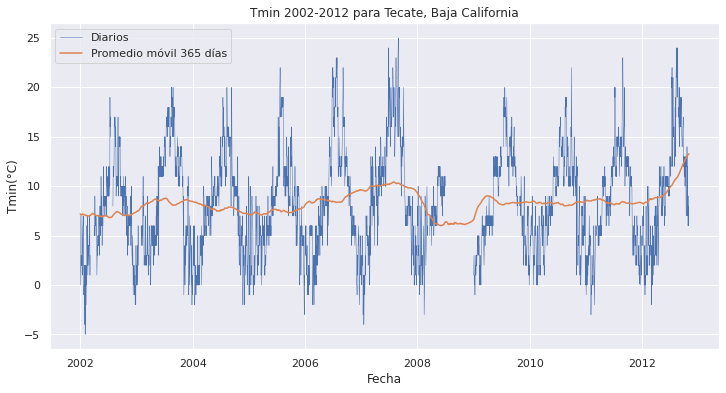

In [62]:
#FECHA DE INICIO Y DE FIN
start, end = '2002', '2012'

# CONTRASTE DE LA GRAFICA DIARIO CON LA CURVA SUAVIZADA A 30 DÍAS
sns.set(rc={'figure.figsize':(12, 6)})

for name, ax in zip(['Tmax','Tmin'],axes):
  fig, ax = plt.subplots()
  ax.plot(df_90.loc[start:end, name], linestyle='-', linewidth=0.5, label='Diarios')
  ax.plot(df_90_365d.loc[start:end, name], linestyle='-', label=f'Promedio móvil {365} días')
 
  ax.set_xlabel('Fecha')
  ax.set_ylabel(name +'(°C)')
  ax.set_title(name+' '+ start+'-'+ end + ' para Tecate, Baja California')
  ax.legend();

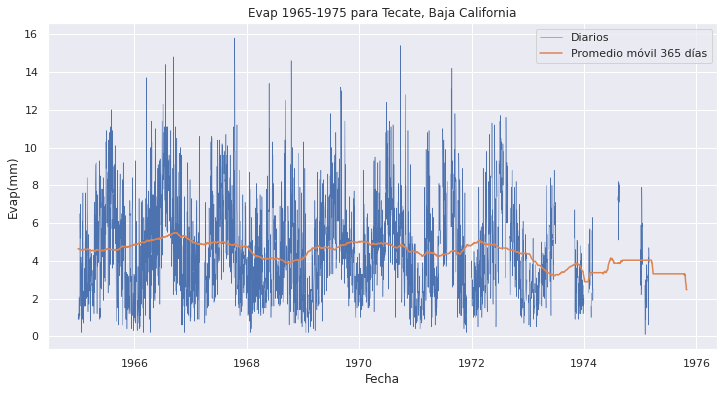

In [63]:
#FECHA DE INICIO Y DE FIN
start, end = '1965', '1975'

# CONTRASTE DE LA GRAFICA DIARIO CON LA CURVA SUAVIZADA A 30 DÍAS
sns.set(rc={'figure.figsize':(12, 6)})

for name, ax in zip(['Evap'],axes):
  fig, ax = plt.subplots()
  ax.plot(df_60.loc[start:end, name], linestyle='-', linewidth=0.5, label='Diarios')
  ax.plot(df_60_365d.loc[start:end, name], linestyle='-', label=f'Promedio móvil {365} días')
 
  ax.set_xlabel('Fecha')
  ax.set_ylabel(name +'(mm)')
  ax.set_title(name+' '+ start+'-'+ end + ' para Tecate, Baja California')
  ax.legend();

# **A5**

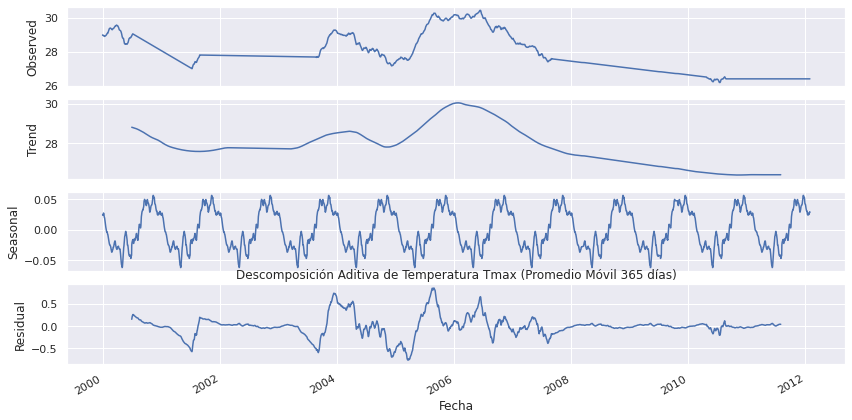

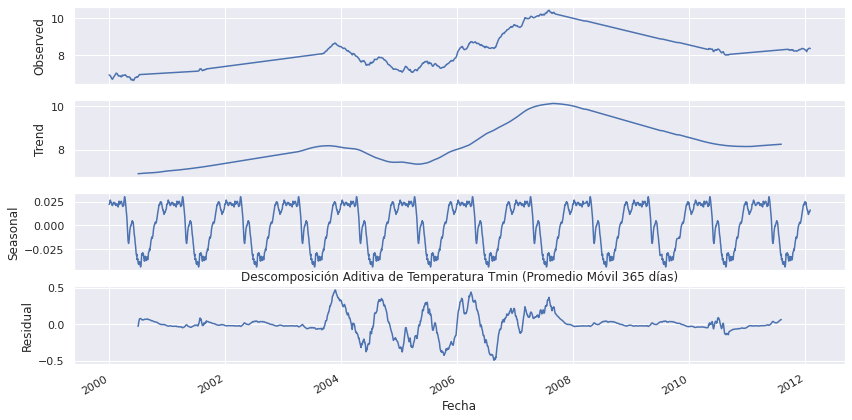

In [21]:
# Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-01'

# Ciclo anual 365 días
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
for name, ax in zip(['Tmax','Tmin'],axes):
  resT365 = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, name].interpolate(),
                                    freq=decompfreq, model='additive')
  resT365.plot()

  plt.title('Descomposición Aditiva de Temperatura '+ name +' (Promedio Móvil 365 días)');

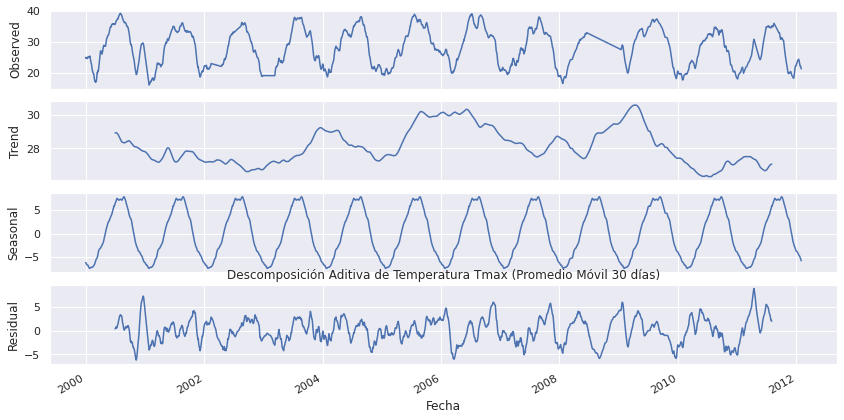

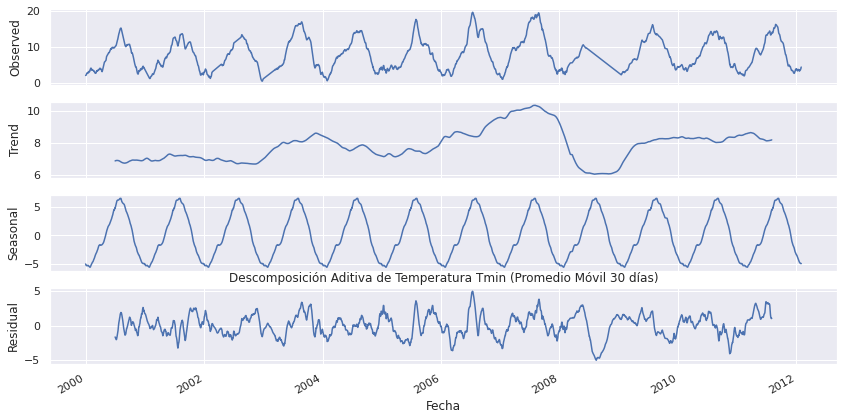

In [22]:
# Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-01'

# Ciclo anual 365 días
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
for name, ax in zip(['Tmax','Tmin'],axes):
  resT30 = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, name].interpolate(),
                                    freq=decompfreq, model='additive')
  resT30.plot()

  plt.title('Descomposición Aditiva de Temperatura '+ name +' (Promedio Móvil 30 días)');

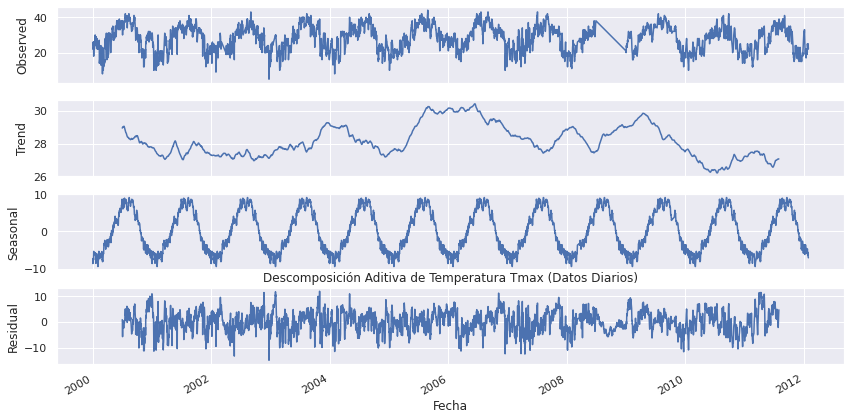

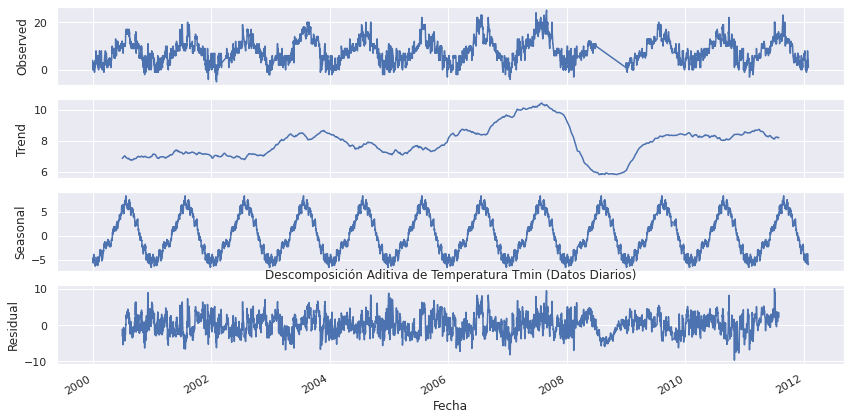

In [23]:
# Uso de datos diarios.
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2000-01', '2012-01'

# Ciclo anual 365 días
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
for name, ax in zip(['Tmax','Tmin'],axes):
  resTD = sm.tsa.seasonal_decompose(df_90.loc[start:end, name].interpolate(),
                                    freq=decompfreq, model='additive')
  resTD.plot()

  plt.title('Descomposición Aditiva de Temperatura '+ name +' (Datos Diarios)');

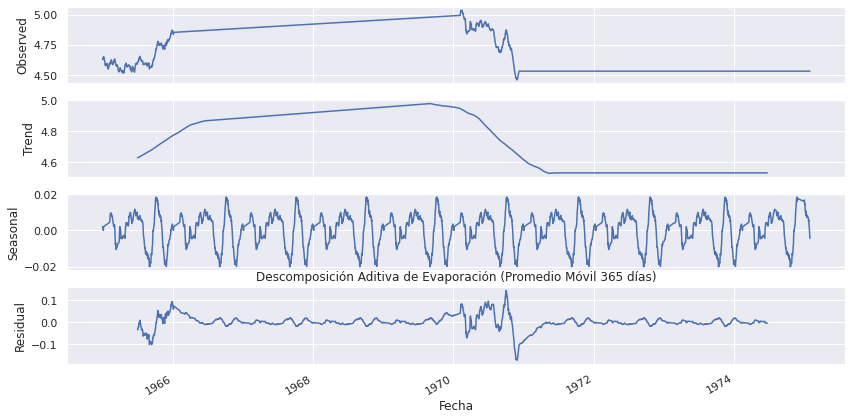

In [24]:
# Uso de Promedio Móvil 365 días
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1965-01', '1975-01'

# Ciclo anual 365 días
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

# Promedio Móvil 365 días
for name, ax in zip(['Evap'],axes):
  resEvap365 = sm.tsa.seasonal_decompose(df_60_365d.loc[start:end, name].interpolate(),
                                    freq=decompfreq, model='additive')
  
  resEvap365.plot()

  plt.title('Descomposición Aditiva de Evaporación (Promedio Móvil 365 días)');

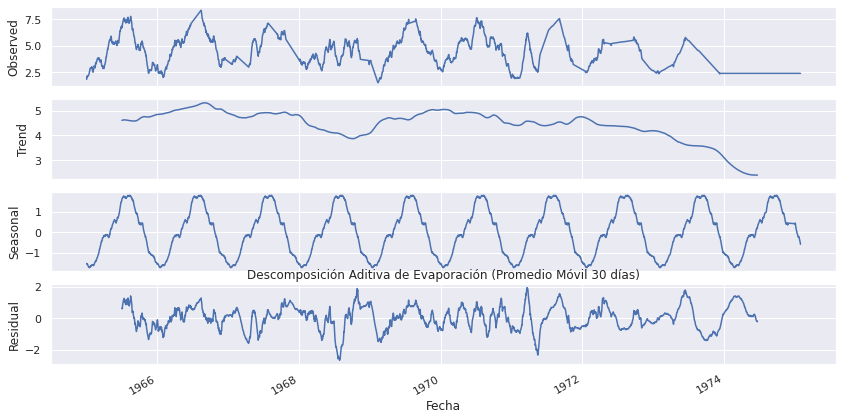

In [25]:
# Uso de datos Promedio Móvil 30 días
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1965-01', '1975-01'

# Ciclo anual 365 días
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
for name, ax in zip(['Evap'],axes):
  resEvap30 = sm.tsa.seasonal_decompose(df_60_30d.loc[start:end, name].interpolate(),
                                    freq=decompfreq, model='additive')
  
  resEvap30.plot()

  plt.title('Descomposición Aditiva de Evaporación (Promedio Móvil 30 días)');

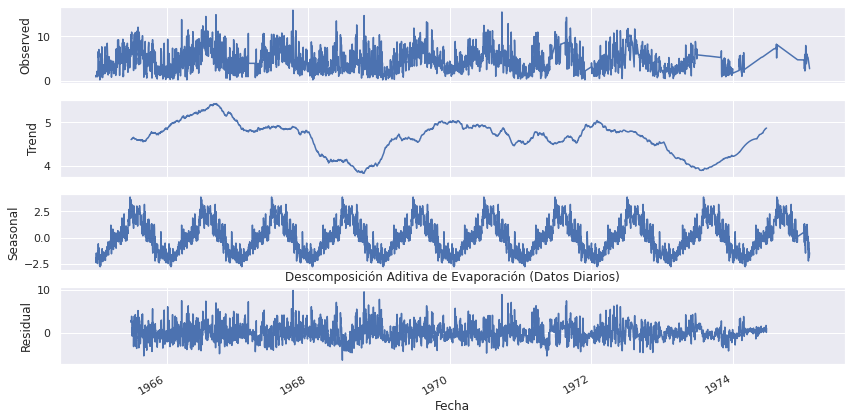

In [26]:
# Uso de datos diarios
# Descomposición de Series de Tiempo 
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1965-01', '1975-01'

# Ciclo anual 365 días
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

for name, ax in zip(['Evap'],axes):
  resEvapD = sm.tsa.seasonal_decompose(df_60.loc[start:end, name].interpolate(),
                                    freq=decompfreq, model='additive')
  
  resEvapD.plot()

  plt.title('Descomposición Aditiva de Evaporación (Datos Diarios)');

# **A6**

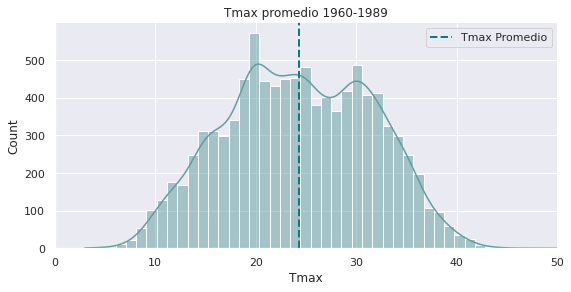

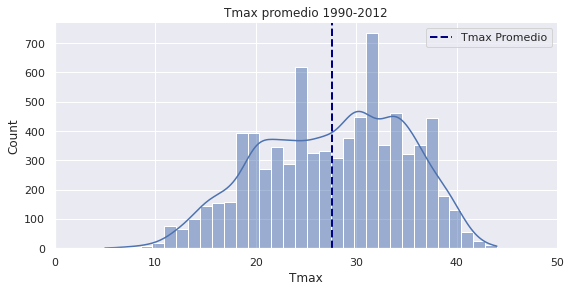

Tmax_promedio df_60 =  24.340125166717986 ºC
Tmax_promedio df_90 =  27.635206988226358 ºC


In [42]:
# Gráfica de distribuciones de Temperaturas Tmax 

g1 = sns.displot(df_60.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmax.mean(), linestyle='--', linewidth=2, color='teal', label=f'Tmax Promedio');

g1.set(title='Tmax promedio 1960-1989');

g1.set(xlim=(0,50))

plt.legend();
    

g2 = sns.displot(df_90.Tmax, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmax.mean(), linestyle='--', linewidth=2, color='navy', label=f'Tmax Promedio');

g2.set(title='Tmax promedio 1990-2012');

g2.set(xlim=(0,50))

plt.legend();
plt.show();

print('Tmax_promedio df_60 = ', df_60.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmax.mean(), 'ºC' )

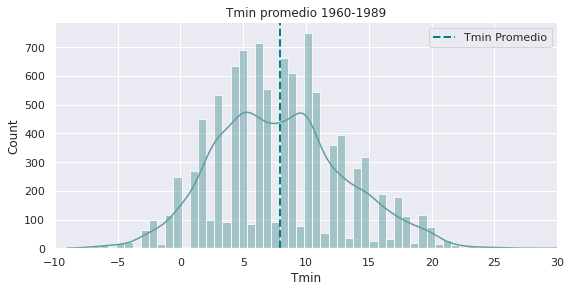

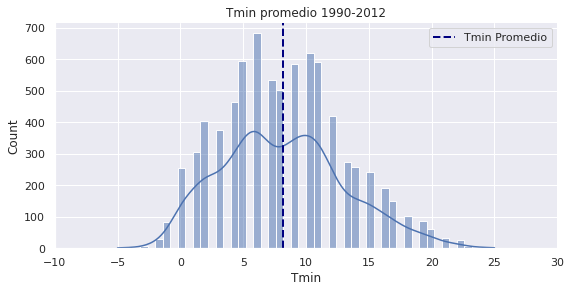

Tmin_promedio df_60 =  7.895453612479473 ºC
Tmin_promedio df_90 =  8.161823469903895 ºC


In [64]:
# Gráfica de distribuciones de Temperaturas Tmin

# Subplot 1
g1 = sns.displot(df_60.Tmin, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmin.mean(), linestyle='--', linewidth=2, color='teal', label=f'Tmin Promedio');
g1.set(title='Tmin promedio 1960-1989');
g1.set(xlim=(-10,30))
plt.legend();
    
# Subplot 2
g2 = sns.displot(df_90.Tmin, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmin.mean(), linestyle='--', linewidth=2, color='navy', label=f'Tmin Promedio');
g2.set(title='Tmin promedio 1990-2012');
g2.set(xlim=(-10,30))
plt.legend();

plt.show();

print('Tmin_promedio df_60 = ', df_60.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_90 = ', df_90.Tmin.mean(), 'ºC' )